# EDA

In [78]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('husl')
from wordcloud import WordCloud

import json

In [4]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test/test.csv')
merged = pd.concat([train_df.iloc[:, :-1].assign(Dataset='train'),
                    test_df.assign(Dataset='test')])
breeds = pd.read_csv('./data/breed_labels.csv')
colors = pd.read_csv('./data/color_labels.csv')
states = pd.read_csv('./data/state_labels.csv')

In [4]:
train_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [5]:
test_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,1,Puppy,2,307,0,1,1,0,0,2,...,2,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,"Puppy is calm for a young dog, but he becomes ...",378fcc4fc,3.0
1,2,London,24,266,0,1,2,7,0,2,...,1,1,1,0,41326,4475f31553f0170229455e3c5645644f,0,Urgently seeking adoption. Please contact for ...,73c10e136,1.0
2,2,Snowball,20,266,0,2,7,0,0,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,Snowball... doesn't look so good (she is healt...,72000c4c5,1.0
3,2,Malibu,5,266,252,2,1,6,7,2,...,1,1,1,100,41326,4475f31553f0170229455e3c5645644f,0,"Malibu: Female, Local Mix, 4-5 months, vaccina...",e147a4b9f,1.0
4,1,Lala Girl,6,307,0,2,1,2,7,2,...,1,1,1,150,41326,4475f31553f0170229455e3c5645644f,0,LALA! That's my name. I'm a 6 month old girl d...,43fbba852,1.0


In [7]:
merged.columns.tolist()

['Type',
 'Name',
 'Age',
 'Breed1',
 'Breed2',
 'Gender',
 'Color1',
 'Color2',
 'Color3',
 'MaturitySize',
 'FurLength',
 'Vaccinated',
 'Dewormed',
 'Sterilized',
 'Health',
 'Quantity',
 'Fee',
 'State',
 'RescuerID',
 'VideoAmt',
 'Description',
 'PetID',
 'PhotoAmt',
 'Dataset']

In [8]:
merged.isna().sum()

Type               0
Name            1560
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
RescuerID          0
VideoAmt           0
Description       14
PetID              0
PhotoAmt           0
Dataset            0
dtype: int64

In [9]:
merged.dtypes

Type              int64
Name             object
Age               int64
Breed1            int64
Breed2            int64
Gender            int64
Color1            int64
Color2            int64
Color3            int64
MaturitySize      int64
FurLength         int64
Vaccinated        int64
Dewormed          int64
Sterilized        int64
Health            int64
Quantity          int64
Fee               int64
State             int64
RescuerID        object
VideoAmt          int64
Description      object
PetID            object
PhotoAmt        float64
Dataset          object
dtype: object

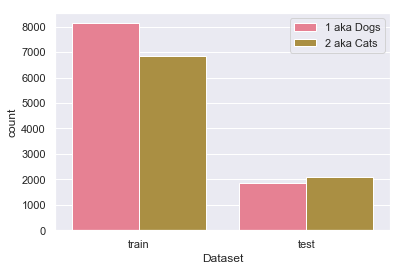

In [10]:
sns.countplot(x='Dataset', data=merged, hue='Type')
plt.legend(['1 aka Dogs', '2 aka Cats'])
plt.show()

In [11]:
merged.Name.sample(n=20)

2502                       Snowy
5623                         Gem
2831                      Hensem
7166     Bobby (Found/Abandoned)
813                        Zorro
1618            4 Little Kitties
800                      Vincent
8262            Sam And The Gang
10357       Spunky Calico Kitten
10359    BOB, CASEY, RUM, SILKY.
2377                      Casper
10154               May & Flower
10586                  4 Sisters
13762                       Mona
5737                         NaN
7684                     Brownie
5826                       Mi Mi
5249          Bob The Gentle Cat
80                     MPSP-F-01
4265                       Mojie
Name: Name, dtype: object

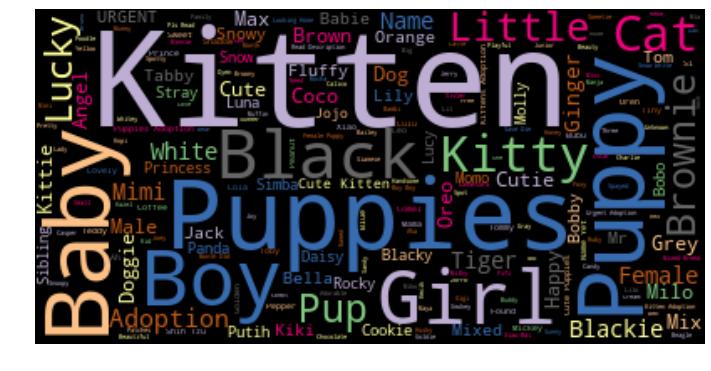

In [12]:
wordcloud = WordCloud(colormap='Accent').generate(' '.join(merged.Name.dropna().tolist()))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

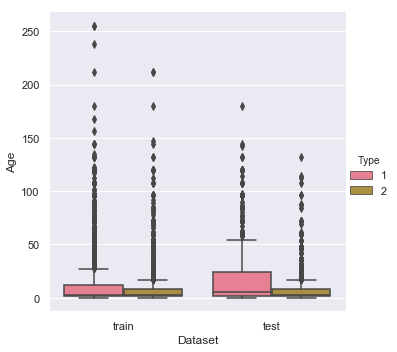

In [79]:
sns.catplot(x='Dataset', y='Age', hue='Type', data=merged, kind='box')
plt.show()

In [124]:
breeds.shape[0]

307

In [83]:
# Типа NAN?????
(merged.Breed1 == 0).sum()

5

In [106]:
breed_dict = dict(breeds[['BreedID', 'BreedName']].values)
breed_dict[0] = np.nan

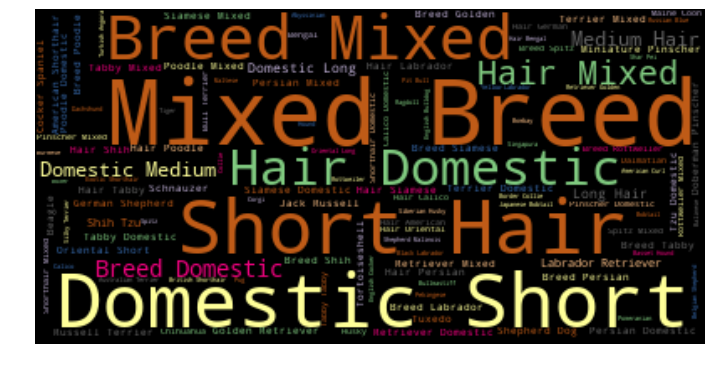

In [245]:
wordcloud = WordCloud(colormap='Accent').generate(' '.join(merged.Breed1.map(breed_dict).dropna()))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

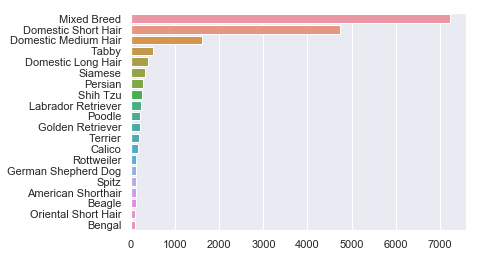

In [246]:
top_breeds = merged.Breed1.map(breed_dict).dropna().value_counts()[:20]
sns.barplot(y=top_breeds.index, x=top_breeds.values, orient='h')
plt.show()

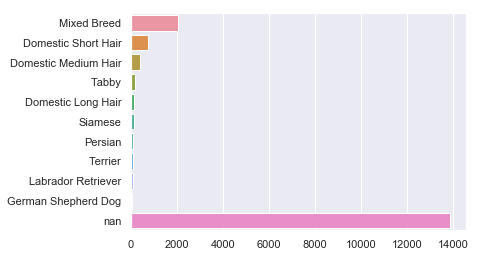

In [248]:
top_breeds = merged.Breed2.map(breed_dict).value_counts()[:10]
top_breeds['nan'] = merged.Breed2.map(breed_dict).isna().sum()
sns.barplot(y=top_breeds.index, x=top_breeds.values, orient='h')
plt.show()

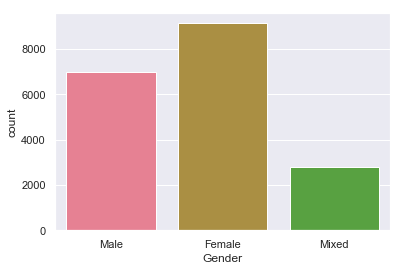

In [159]:
sns.countplot(x='Gender', data=merged)
plt.xticks([0, 1, 2], ['Male', 'Female', 'Mixed'])
plt.show()

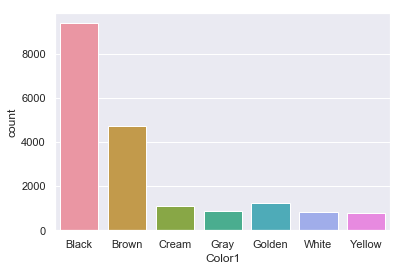

In [249]:
colors_dict = dict(zip(colors.ColorID, colors.ColorName))
colors_dict[0] = 'nan'

sns.countplot(merged.Color1.map(colors_dict))
plt.show()

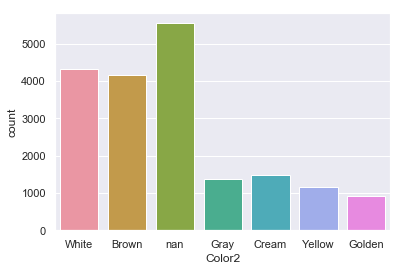

In [250]:
sns.countplot(merged.Color2.map(colors_dict))
plt.show()

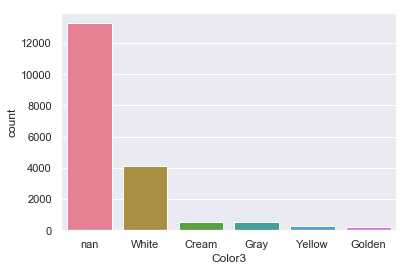

In [251]:
sns.countplot(merged.Color3.map(colors_dict))
plt.show()

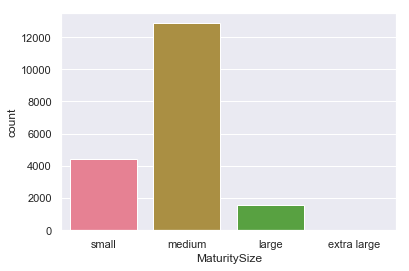

In [202]:
sns.countplot(merged.MaturitySize)
plt.xticks(np.arange(4), ['small', 'medium', 'large', 'extra large'])
plt.show()

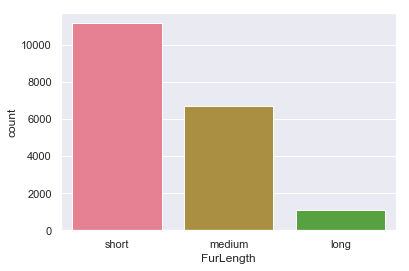

In [204]:
sns.countplot(merged.FurLength)
plt.xticks(np.arange(3), ['short', 'medium', 'long'])
plt.show()

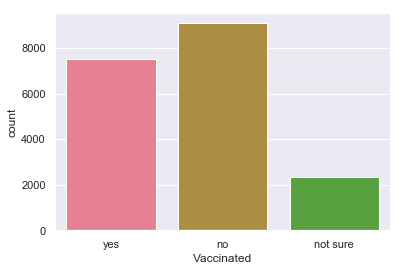

In [211]:
sns.countplot(merged.Vaccinated)
plt.xticks(np.arange(3), ['yes', 'no', 'not sure'])
plt.show()

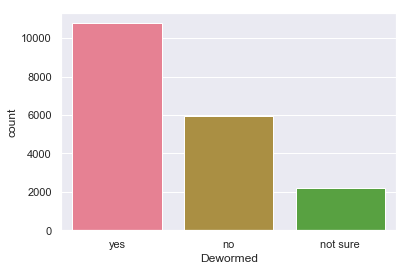

In [212]:
sns.countplot(merged.Dewormed)
plt.xticks(np.arange(3), ['yes', 'no', 'not sure'])
plt.show()

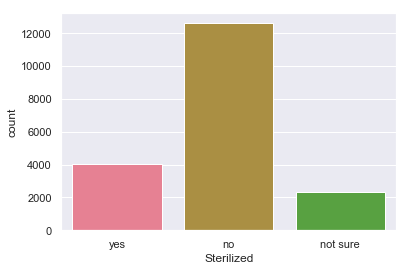

In [213]:
sns.countplot(merged.Sterilized)
plt.xticks(np.arange(3), ['yes', 'no', 'not sure'])
plt.show()

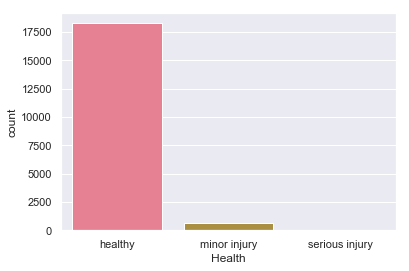

In [217]:
sns.countplot(merged.Health)
plt.xticks(np.arange(3), ['healthy', 'minor injury', 'serious injury'])
plt.show()

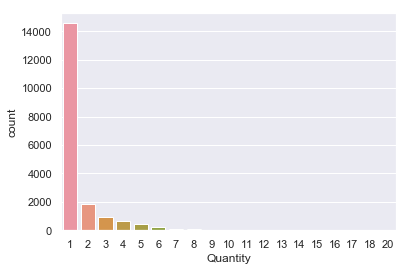

In [221]:
sns.countplot(merged.Quantity)
plt.show()

In [230]:
(merged.Fee == 0).sum()

15863

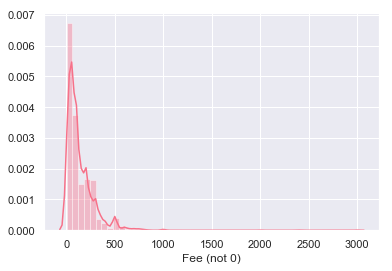

In [235]:
sns.distplot(merged.Fee[merged.Fee != 0])
plt.xlabel('Fee (not 0)')
plt.show()

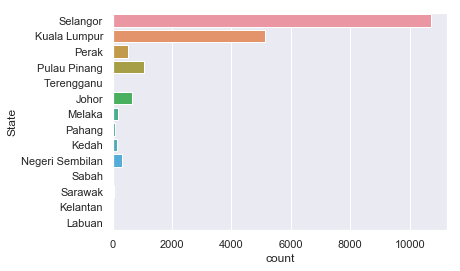

In [257]:
states_dict = dict(zip(states.StateID, states.StateName))
sns.countplot(y=merged.State.map(states_dict), orient='h')
plt.show()

In [7]:
# намана пацаны спасают
merged.RescuerID.value_counts()[:20]

fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
ee2747ce26468ec44c7194e7d1d9dad9    156
4475f31553f0170229455e3c5645644f    146
95481e953f8aed9ec3d16fc4509537e8    134
b770bac0ca797cf1433c48a35d30c4cb    111
a042471e0f43f2cf707104a1a138a7df     95
fd970cc91d06d82eebf046340137b272     93
7ed6d84e2e6879245e55447aee39c328     85
0a1ff8402419c5fc2987085711928887     81
e62135526c27156b8479420aad166317     77
438a9bdce8ef4d5948fc40e422d34d0d     75
8b6c5cd067ada5f54ca5ffc7f7b5d896     74
a784899699776c1e71d9bc51bf45459c     74
644449224c6fd82a2dbbc6155ade9aed     67
cccb18b8f8b81862f9a1ebc65d651d22     65
0b19581048b55d65caa01d1d62b93330     64
e6a42485af66a5fbf3f21fc8242fbf57     62
Name: RescuerID, dtype: int64

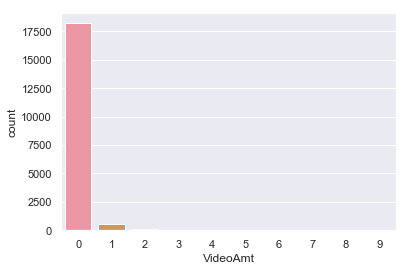

In [11]:
sns.countplot(merged.VideoAmt)
plt.show()

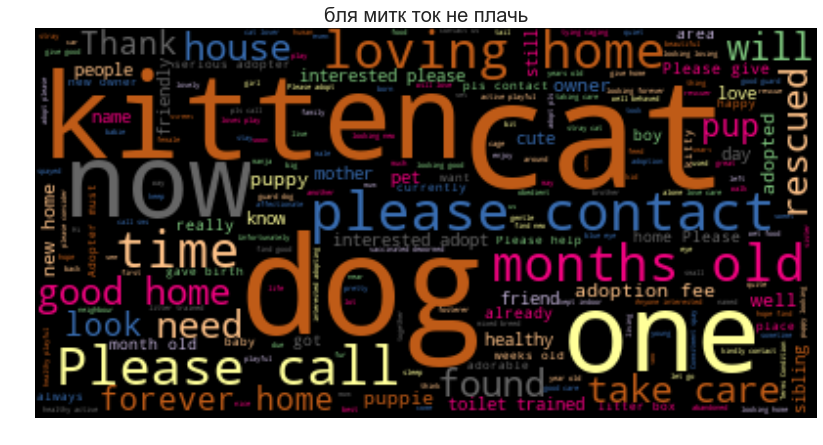

In [30]:
wordcloud = WordCloud(colormap='Accent').generate(' '.join(merged.Description.dropna()))
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('бля митк ток не плачь', fontsize=20)
plt.show()

In [47]:
print('\n\n'.join(merged.Description.sample(3).tolist()))

We found April on the 1st of April, hence the name. She was wandering around Dataran Mentari, Sunway. Her owner has decided to let her go to a better home. Anyone who wishes to adopt this adorable dog please call (Danny)

very cute. very lovable. but i cant take care of him anymore as im living in a rental house and the owner doesnt allowed pets in the house.

I found her on the streets about 3 months ago and she was very frightened and hungry. Since I have cat food, I decided to feed her. Now she's a healthy and playful girl. She's very nice and likes rubbing against people. In other words, she's quite "manja". She knows when she does something wrong as she hides and peeks at you from her hiding spot after a scolding. She enjoys playing 'catching' and hide-and-seek. She'll look at you playfully and when you're near her, she'll turn around and run off, hoping you'll catch and play with her. She knows how to do her business in the cat litre. She has also started hunting for little insec

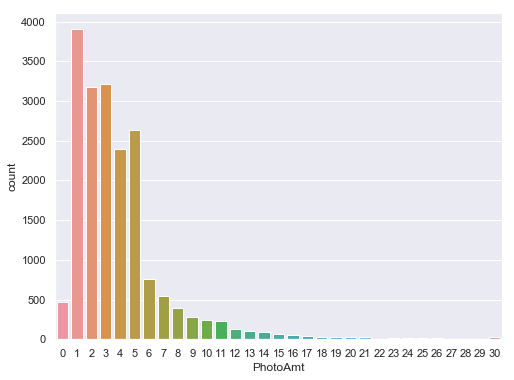

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(merged.PhotoAmt.astype(int), orient='h')
plt.show()

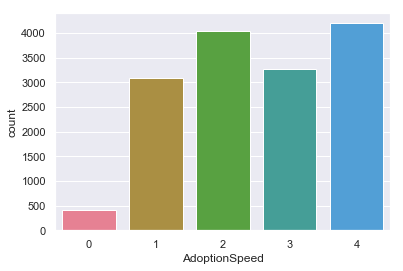

In [62]:
sns.countplot(train_df.AdoptionSpeed)
plt.show()

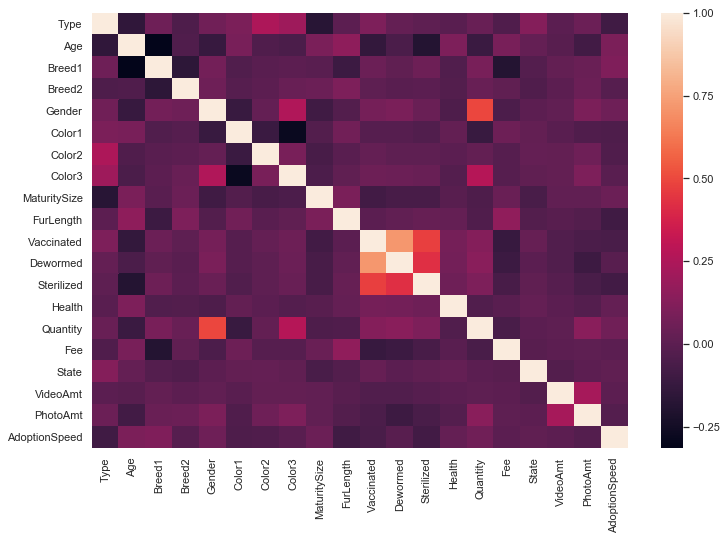

In [76]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr())
plt.show()

In [92]:
with open('./data/train_sentiment/54c2d49bb.json') as fp:
     sent_example = json.load(fp)

In [93]:
sent_example

{'sentences': [{'text': {'content': 'This is the last pup from my original post about black puppies.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0, 'score': 0}},
  {'text': {'content': 'I named him Sucky because he loves sucking stuffs and before this he kept sucking his brothers and sisters.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0.9, 'score': -0.9}},
  {'text': {'content': 'Unfortunately all his brothers and sisters were adopted and Sucky is the last one.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0.8, 'score': -0.8}},
  {'text': {'content': 'Poor guy cried himself to sleep that night.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0.6, 'score': -0.6}},
  {'text': {'content': 'I dont know the breed.', 'beginOffset': -1},
   'sentiment': {'magnitude': 0.1, 'score': -0.1}},
  {'text': {'content': 'I took him to the vet and got him de-wormed.',
    'beginOffset': -1},
   'sentiment': {'magnitude': 0, 'score': 0}},
  {'text': {'content':

## To do
* https://cloud.google.com/natural-language/docs/basics прочекать суть